# Tugas Analisis dan Visualisasi data

Oleh : Tito Tamaro <br>
Source : https://github.com/Lecturer-Jcds/Data-Analytics-Visualization-Exercise

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
# warnings.filterwarnings('ignore')

## Profesi

Karena delimiter pada file profesi.csv menggunakan '|', delimiter diganti menggunakan editor lain menjadi ','<br>
Nama file profesi.csv menjadi profesi2.csv setelah delimeter diubah

In [8]:
df=pd.read_csv('profesi2.csv')

In [9]:
df.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


1. Ada berapa jenis profesi yang ada dalam dataset tersebut? Sebutkan!

In [10]:
profesi = df['occupation'].unique()

print(len(profesi))
print(profesi)

21
['technician' 'other' 'writer' 'executive' 'administrator' 'student'
 'lawyer' 'educator' 'scientist' 'entertainment' 'programmer' 'librarian'
 'homemaker' 'artist' 'engineer' 'marketing' 'none' 'healthcare' 'retired'
 'salesman' 'doctor']


2. Buatlah sebuah dataframe yang menunjukkan data usia maksimal, minimal & rata-ratanya, kemudian dikelompokkan berdasarkan profesi & gender!

In [60]:
x = df.groupby(['occupation','gender'],as_index=True).agg({'age':['max','min','mean']}).rename(columns={'max':'max_usia','min':'min_usia','mean':'rerata_usia'})
x.columns=x.columns.droplevel(0) # menghilangkan multi-level column index
x

max_usia  min_usia  rerata_usia
occupation    gender                                 
administrator F             62        22    40.638889
              M             70        21    37.162791
artist        F             48        19    30.307692
              M             45        20    32.333333
doctor        M             64        28    43.571429
educator      F             51        23    39.115385
              M             63        25    43.101449
engineer      F             36        23    29.500000
              M             70        22    36.600000
entertainment F             38        24    31.000000
              M             50        15    29.000000
executive     F             49        39    44.000000
              M             69        22    38.172414
healthcare    F             53        22    39.818182
              M             62        28    45.400000
homemaker     F             50        20    34.166667
              M             23        23    23.000000
lawyer        F             51        28    39.500000
              M             53        21    36.200000
librarian     F             59        26    40.000000
              M             69        23    40.000000
marketing     F             50        24    37.200000
              M             55        24    37.875000
none          F             55        26    36.500000
              M             33        11    18.600000
other         F             55        18    35.472222
              M             64        13    34.028986
programmer    F             38        26    32.166667
              M             63        20    33.216667
retired       F             70        70    70.000000
              M             73        51    62.538462
salesman      F             33        18    27.000000
              M             66        21    38.555556
scientist     F             31        26    28.333333
              M             55        23    36.321429
student       F             38        13    20.750000
              M             42         7    22.669118
technician    F             38        38    38.000000
              M             55        21    32.961538
writer        F             56        18    37.631579
              M             60        21    35.346154

3. Buatlah sebuah dataframe yang menunjukkan persentase pria & wanita tiap profesi!

In [196]:
df1 = pd.crosstab(index=df['occupation'], columns=df['gender'],normalize='index') *100
df1['%total'] = df1['F']+df1['M']

col_list = list(df1)
col_list[0], col_list[1] = col_list[1], col_list[0]
df1.columns = col_list
df1.index.names = ['']
df1.rename(columns={'F':'%female','M':'%male'})

,%male,%female,%total
,,,
administrator,45.569620,54.430380,100.0
artist,46.428571,53.571429,100.0
doctor,0.000000,100.000000,100.0
educator,27.368421,72.631579,100.0
engineer,2.985075,97.014925,100.0
entertainment,11.111111,88.888889,100.0
executive,9.375000,90.625000,100.0
healthcare,68.750000,31.250000,100.0
homemaker,85.714286,14.285714,100.0


## Harga Historis Saham Provider Telco Indonesia

1. Buatlah sebuah file python maupun jupyter notebook .ipynb yang mengakses data dari ke-4 file .csv tersebut, kemudian tampilkan data plot harga penutupan (close) harian seluruh data yang ada. Output yang diharapkan berupa grafik garis yang menampilkan harga penutupan (close) harian dari ke-4 perusahaan telco selama 3 bulan terakhir

In [80]:
df_xl = pd.read_csv('EXCL.JK.csv')
df_fren = pd.read_csv('FREN.JK.csv')
df_indosat = pd.read_csv('ISAT.JK.csv')
df_telkomsel = pd.read_csv('TLKM.JK.csv')

In [81]:
df_xl.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-18,2580.0,2720.0,2570.0,2700.0,2700.0,21103300
1,2019-03-19,2700.0,2730.0,2610.0,2650.0,2650.0,10211800
2,2019-03-20,2650.0,2720.0,2610.0,2700.0,2700.0,13744500
3,2019-03-21,2730.0,2760.0,2670.0,2680.0,2680.0,10669000
4,2019-03-22,2700.0,2720.0,2650.0,2660.0,2660.0,2572000


In [155]:
df_xl.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
60,2019-06-10,2950.0,3020.0,2910.0,2940.0,2940.0,14450100
61,2019-06-11,2980.0,3000.0,2920.0,2940.0,2940.0,5801400
62,2019-06-12,2980.0,2980.0,2860.0,2900.0,2900.0,6123100
63,2019-06-13,2850.0,2870.0,2810.0,2860.0,2860.0,8567800
64,2019-06-14,2860.0,2930.0,2840.0,2860.0,2860.0,5537200


In [61]:
plt.style.use('ggplot')

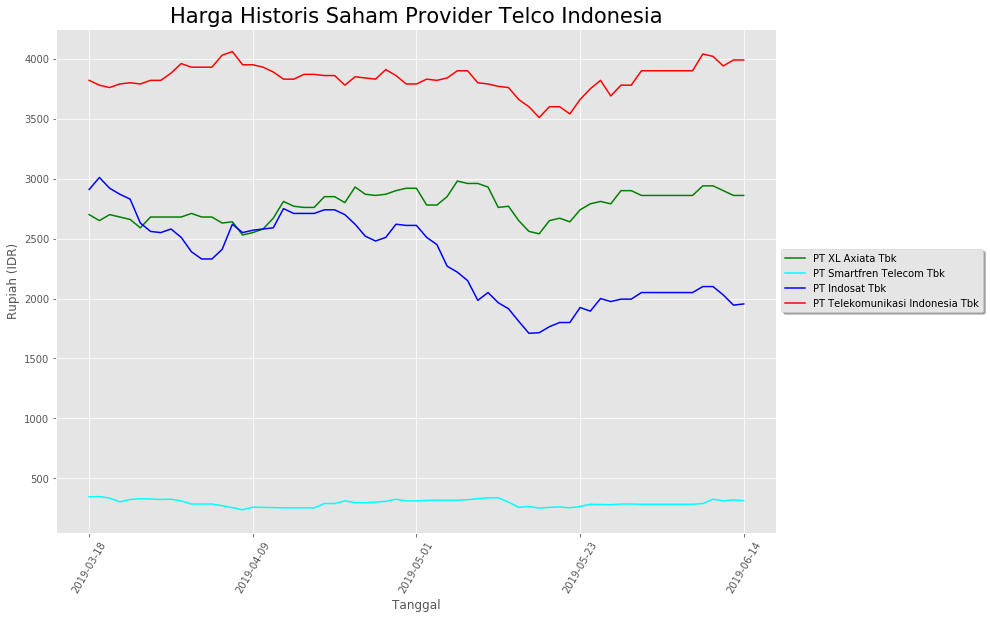

In [176]:
fig = plt.figure(figsize=(10,7))

ax1=fig.add_axes([1,1,1,1])
ax2=fig.add_axes([1,1,1,1])
ax3=fig.add_axes([1,1,1,1])
ax4=fig.add_axes([1,1,1,1])

# Axis 
ax1.plot(df_xl['Date'], df_xl['Close'], color='g',label='PT XL Axiata Tbk') 
ax1.set_xticks(ax1.get_xticks()[::2])

ax2.plot(df_fren['Date'], df_fren['Close'], color='cyan',label='PT Smartfren Telecom Tbk') 
ax2.set_xticks(ax2.get_xticks()[::2])

ax3.plot(df_indosat['Date'], df_indosat['Close'], color='b',label='PT Indosat Tbk')
ax3.set_xticks(ax3.get_xticks()[::2])

ax4.plot(df_telkomsel['Date'], df_telkomsel['Close'], color='r',label='PT Telekomunikasi Indonesia Tbk')
ax4.set_xticks(ax4.get_xticks()[::2])

plt.title('Harga Historis Saham Provider Telco Indonesia',size=21,)
plt.xlabel('Tanggal')
plt.ylabel('Rupiah (IDR)')
plt.xticks(rotation=60)
plt.yticks()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fancybox=True, shadow=True, ncol=1)
plt.show()

2. Tampilkan data plot harga penutupan (close) harian selama bulan April 2019. Output yang diharapkan berupa grafik garis yang menampilkan harga penutupan (close) harian dari ke-4 perusahaan telco selama bulan April 2019

In [194]:
xl = df_xl['Date'].iloc[10:32]
fren = df_fren['Date'].iloc[10:32]
indosat = df_indosat['Date'].iloc[10:32]
telkomsel = df_telkomsel['Date'].iloc[10:32]

xl_close = df_xl['Close'].iloc[10:32]
fren_close = df_fren['Close'].iloc[10:32]
indosat_close = df_indosat['Close'].iloc[10:32]
telkomsel_close = df_telkomsel['Close'].iloc[10:32]

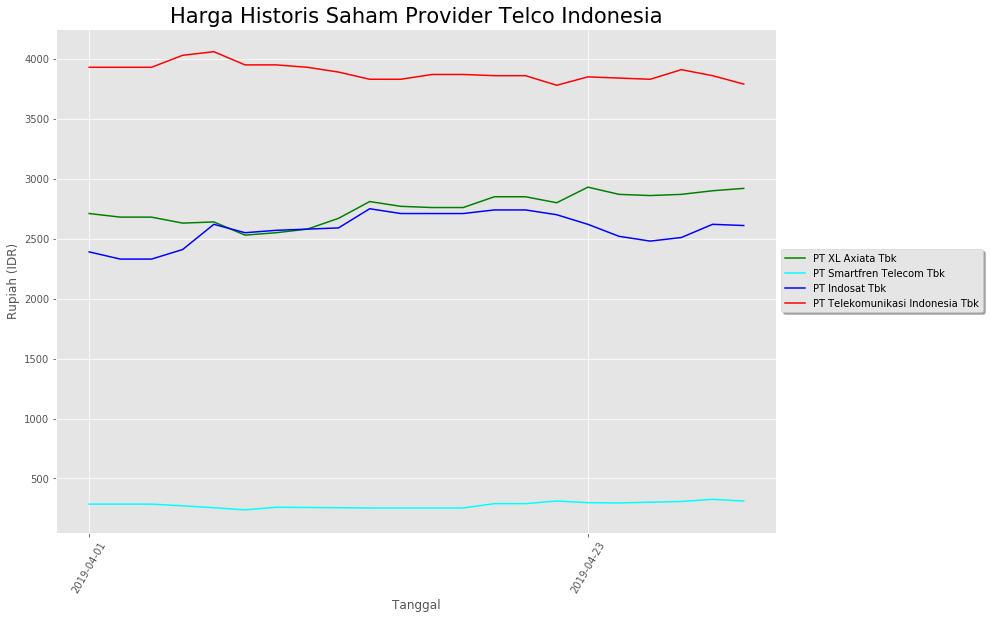

In [195]:
fig = plt.figure(figsize=(10,7))

ax1=fig.add_axes([1,1,1,1])
ax2=fig.add_axes([1,1,1,1])
ax3=fig.add_axes([1,1,1,1])
ax4=fig.add_axes([1,1,1,1])

# Axis 
ax1.plot(xl, xl_close, color='g',label='PT XL Axiata Tbk') 
ax1.set_xticks(ax1.get_xticks()[::2])

ax2.plot(fren, fren_close, color='cyan',label='PT Smartfren Telecom Tbk') 
ax2.set_xticks(ax2.get_xticks()[::2])

ax3.plot(indosat, indosat_close, color='b',label='PT Indosat Tbk')
ax3.set_xticks(ax3.get_xticks()[::2])

ax4.plot(telkomsel, telkomsel_close, color='r',label='PT Telekomunikasi Indonesia Tbk')
ax4.set_xticks(ax4.get_xticks()[::2])

plt.title('Harga Historis Saham Provider Telco Indonesia',size=21,)
plt.xlabel('Tanggal')
plt.ylabel('Rupiah (IDR)')
plt.xticks(rotation=60)
plt.yticks()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fancybox=True, shadow=True, ncol=1)
plt.show()

##  World Happiness

Exploratory Data Analysis (EDA)

- **Input Raw Data**

In [15]:
df_wh = pd.read_csv('2019.csv')

- **Short Description of Data**

In [16]:
df_wh.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [17]:
df_wh.tail()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [18]:
df_wh.shape

(156, 9)

In [19]:
df_wh.size

1404

Data diatas merupakan data World Happiness Index, dimana setiap negara di berikan score berdasarkan 6 kriteria yaitu GDP per capita, social support, healthy life expectancy, freedom to make life choices, generosity, dan perceptions of corruption. Score kemudian akan menentukan ranking negara, dimana score terbesar akan memperoleh ranking yang paling kecil (1). <br>

Data ini sendiri mempunyai 156 baris dan 9 kolom, dengan jumlah 1404 data dan terdiri dari 156 negara

- **Checking NaN Values**

In [20]:
df_wh.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

Tidak ada NaN values dalam data.<br> Karena NaN values < 50% (NaN values threshold) maka data dapat dianalisa lebih dalam

- **EDA**

Dapat dilihat dari short description of data bahwa 'overall rank' dipengaruhi oleh score (akan dibuktikan menggunakan heatmap di bagian akhir). <br>
Untuk selanjutnya akan dilakukan analisa per kolom dataframe

    - GDP Per Capita

In [21]:
df_wh['GDP per capita'].describe()

count    156.000000
mean       0.905147
std        0.398389
min        0.000000
25%        0.602750
50%        0.960000
75%        1.232500
max        1.684000
Name: GDP per capita, dtype: float64

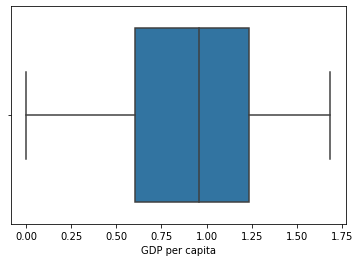

In [22]:
sns.boxplot(df_wh['GDP per capita'])
plt.show()

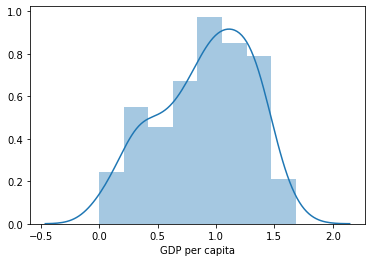

In [23]:
sns.distplot(df_wh['GDP per capita'])
plt.show()

Rerata score untuk 'GDP per capita' ada diangka 0.905147

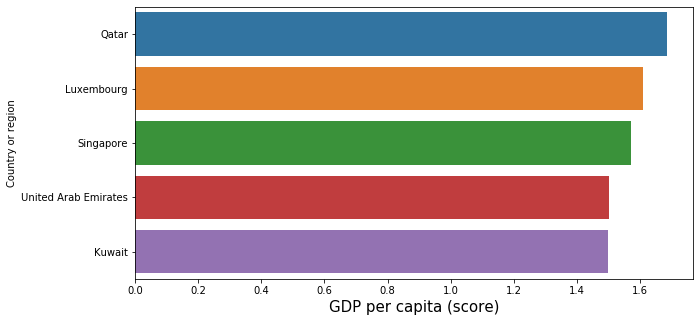

In [24]:
gdp = df_wh.sort_values('GDP per capita').tail(5)[::-1]

plt.figure(figsize=(10,5))
sns.barplot(gdp['GDP per capita'],gdp['Country or region'])
plt.xlabel('GDP per capita (score)',size=15)
plt.show()

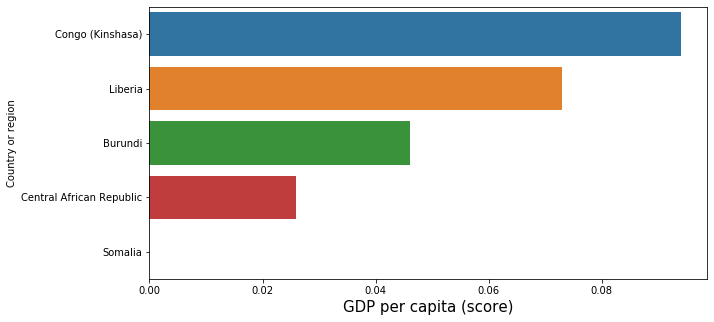

In [25]:
gdp = df_wh.sort_values('GDP per capita').head(5)[::-1]

plt.figure(figsize=(10,5))
sns.barplot(gdp['GDP per capita'],gdp['Country or region'])
plt.xlabel('GDP per capita (score)',size=15)
plt.show()

GDP per capita dari 156 negara dalam data memiliki nilai rata-rata 0.905147 dengan deviasi 0.398389 tidak ditemukan adanya outlier dalam data gdp, perlu diingat angka ini dalam satuan score, bukan dalam bentuk mata uang.<br> Untuk memastikan seberapa besar GDP per capita dalam satuan mata uang diperlukan persamaan yang digunakan untuk menghitung score.<br>

Berikut 5 negara dengan GDP per capita tertinggi :
- Qatar
- Luxemburg
- Singapore
- United Emirates Arab
- Kuwait

Berikut 5 negara dengan GDP per capita terendah : 
- Congo
- Liberia
- Burundi
- Central African Republic
- Somalia

    - Social Support

In [26]:
df_wh['Social support'].describe()

count    156.000000
mean       1.208814
std        0.299191
min        0.000000
25%        1.055750
50%        1.271500
75%        1.452500
max        1.624000
Name: Social support, dtype: float64

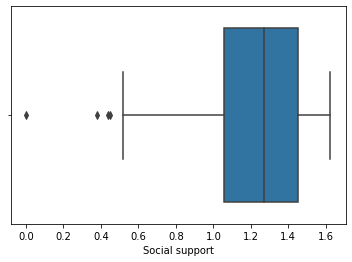

In [27]:
sns.boxplot(df_wh['Social support'])
plt.show()

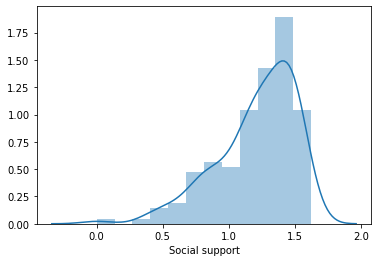

In [28]:
sns.distplot(df_wh['Social support'])
plt.show()

Rerata score untuk 'Social Support' ada diangka 1.208814 dan terdapat 4 negara yang menjadi outlier di bawah lower fence

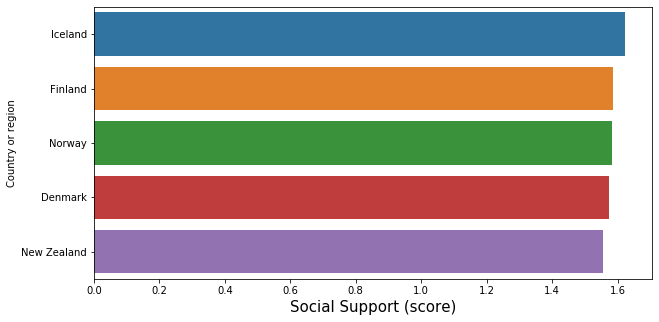

In [29]:
soc = df_wh.sort_values('Social support').tail(5)[::-1]

plt.figure(figsize=(10,5))
sns.barplot(soc['Social support'],soc['Country or region'])
plt.xlabel('Social Support (score)',size=15)
plt.show()

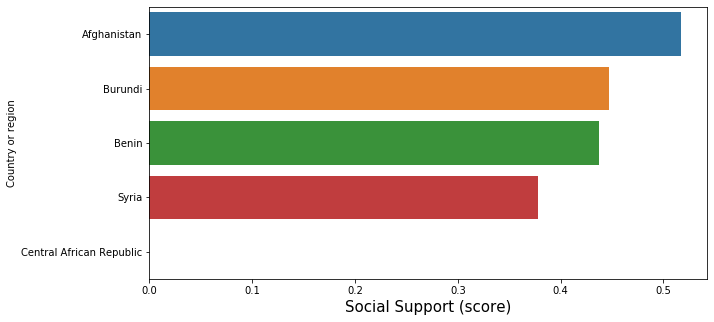

In [30]:
soc = df_wh.sort_values('Social support').head(5)[::-1]

plt.figure(figsize=(10,5))
sns.barplot(soc['Social support'],soc['Country or region'])
plt.xlabel('Social Support (score)',size=15)
plt.show()

Social support dari 156 negara dalam data memiliki nilai rata-rata 1.208814 dengan deviasi 0.299191 ditemukan outlier sebanyak 4 buah dibawah lower fence boxplot, perlu diingat kembali angka ini dalam satuan score bukan besaran fisika yang bisa diukur menggunakan alat ukur sehingga terdapat bias didalamnya.<br> 

Berikut 5 negara dengan Social support tertinggi :
- Iceland
- Finland
- Norway
- Denmark
- New Zealand

Berikut 5 negara dengan Social support terendah : 
- Afghanistan
- Burundi
- Benin
- Syria
- Central African Republic

    - Healthy Life Expectancy

In [31]:
df_wh['Healthy life expectancy'].describe()

count    156.000000
mean       0.725244
std        0.242124
min        0.000000
25%        0.547750
50%        0.789000
75%        0.881750
max        1.141000
Name: Healthy life expectancy, dtype: float64

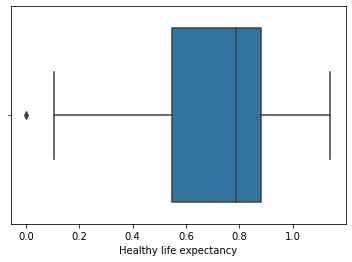

In [32]:
sns.boxplot(df_wh['Healthy life expectancy'])
plt.show()

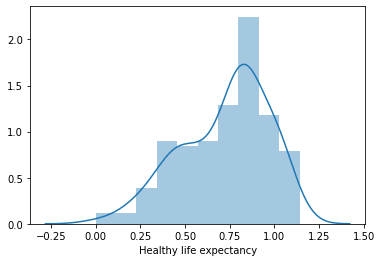

In [33]:
sns.distplot(df_wh['Healthy life expectancy'])
plt.show()

Rerata score untuk 'Healthy Life Expectancy' ada diangka 0.725244 dan terdapat 1 negara yang menjadi outlier di bawah lower fence

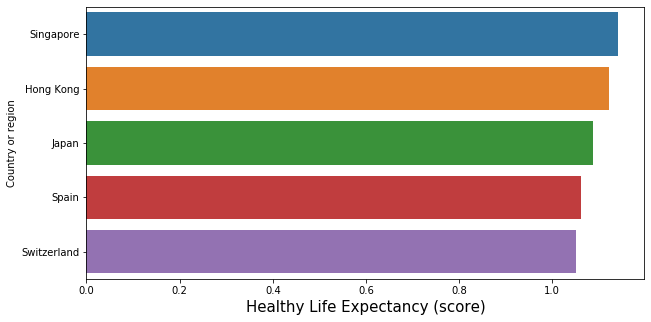

In [34]:
hle=df_wh.sort_values('Healthy life expectancy').tail(5)[::-1]

plt.figure(figsize=(10,5))
sns.barplot(hle['Healthy life expectancy'],hle['Country or region'])
plt.xlabel('Healthy Life Expectancy (score)',size=15)
plt.show()

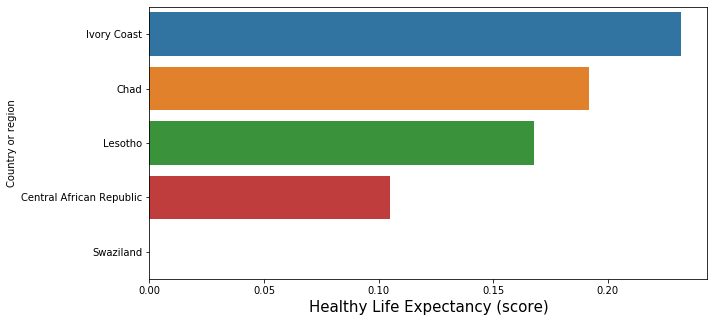

In [35]:
hle = df_wh.sort_values('Healthy life expectancy').head(5)[::-1]

plt.figure(figsize=(10,5))
sns.barplot(hle['Healthy life expectancy'],hle['Country or region'])
plt.xlabel('Healthy Life Expectancy (score)',size=15)
plt.show()

Berikut 5 negara dengan HLE tertinggi :
- Singapore
- Hongkong
- Japan
- Spain
- Switzerland

Berikut 5 negara dengan HLE terendah : 
- Ivory Coast
- Chad
- Lesotho
- Central African Republic
- Swaziland

    - Freedom to make Life Choices

In [36]:
df_wh['Freedom to make life choices'].describe()

count    156.000000
mean       0.392571
std        0.143289
min        0.000000
25%        0.308000
50%        0.417000
75%        0.507250
max        0.631000
Name: Freedom to make life choices, dtype: float64

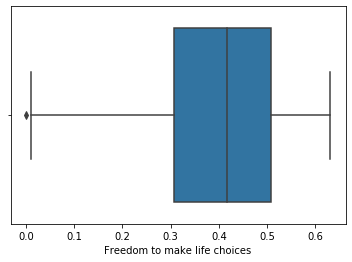

In [37]:
sns.boxplot(df_wh['Freedom to make life choices'])
plt.show()

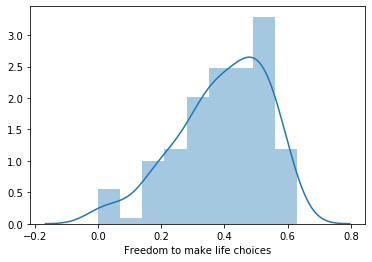

In [38]:
sns.distplot(df_wh['Freedom to make life choices'])
plt.show()

Rerata score untuk 'freedom to make life choices' ada diangka 0.392571 dan terdapat 1 negara yang menjadi outlier di bawah lower fence

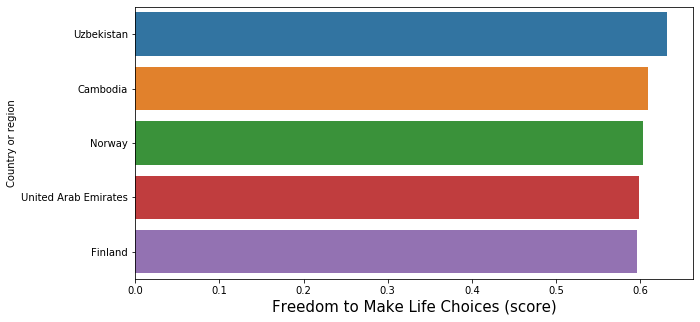

In [39]:
flc=df_wh.sort_values('Freedom to make life choices').tail(5)[::-1]

plt.figure(figsize=(10,5))
sns.barplot(flc['Freedom to make life choices'],flc['Country or region'])
plt.xlabel('Freedom to Make Life Choices (score)',size=15)
plt.show()

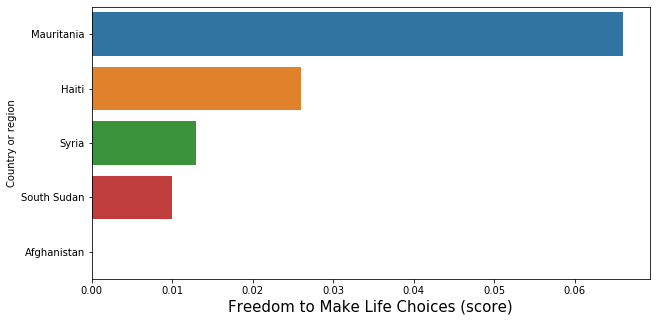

In [40]:
flc=df_wh.sort_values('Freedom to make life choices').head(5)[::-1]

plt.figure(figsize=(10,5))
sns.barplot(flc['Freedom to make life choices'],flc['Country or region'])
plt.xlabel('Freedom to Make Life Choices (score)',size=15)
plt.show()

Berikut 5 negara dengan Freedom to Make Life Choices tertinggi :
- Uzbekistan
- Cambodia
- Norway
- UAE
- Finland

Berikut 5 negara dengan Freedom to Make Life Choices terendah : 
- Mauritania
- Haiti
- Syria
- South Sudan
- Afghanistan

    - Generosity

In [41]:
df_wh['Generosity'].describe()

count    156.000000
mean       0.184846
std        0.095254
min        0.000000
25%        0.108750
50%        0.177500
75%        0.248250
max        0.566000
Name: Generosity, dtype: float64

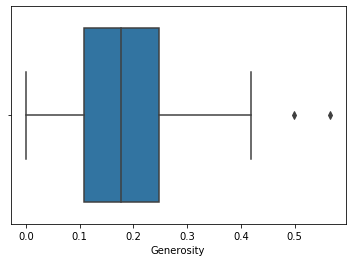

In [42]:
sns.boxplot(df_wh['Generosity'])
plt.show()

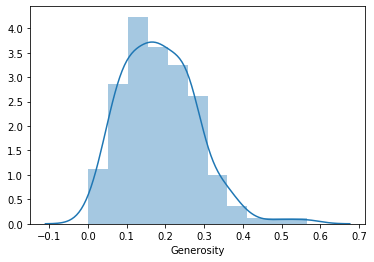

In [43]:
sns.distplot(df_wh['Generosity'])
plt.show()

Rerata score untuk 'Generosity' ada diangka 0.184846 dan tercatat ada 2 negara yang menjadi outlier di atas upper fence

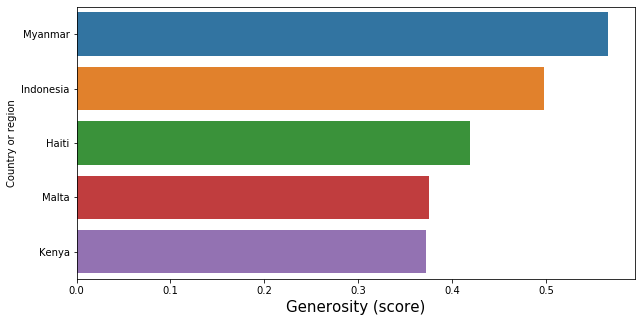

In [44]:
g=df_wh.sort_values('Generosity').tail(5)[::-1]

plt.figure(figsize=(10,5))
sns.barplot(g['Generosity'],g['Country or region'])
plt.xlabel('Generosity (score)',size=15)
plt.show()

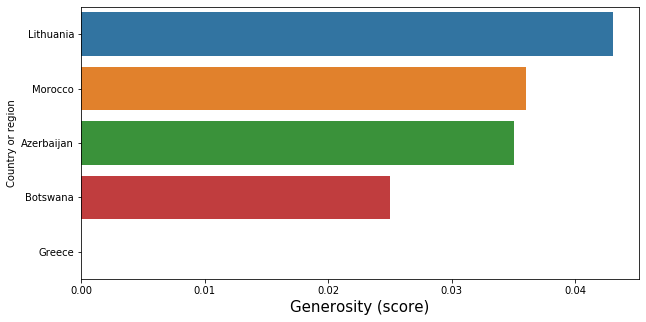

In [45]:
g=df_wh.sort_values('Generosity').head(5)[::-1]

plt.figure(figsize=(10,5))
sns.barplot(g['Generosity'],g['Country or region'])
plt.xlabel('Generosity (score)',size=15)
plt.show()

Berikut 5 negara dengan Generosity tertinggi :
- Myanmar
- Indonesia
- Haiti
- Malta
- Kenya

Berikut 5 negara dengan Generosity terendah : 
- Lithuania
- Morocco
- Azerbaijan
- Botswana
- Greece

    - Perceptions of Corruptions

In [46]:
df_wh['Perceptions of corruption'].describe()

count    156.000000
mean       0.110603
std        0.094538
min        0.000000
25%        0.047000
50%        0.085500
75%        0.141250
max        0.453000
Name: Perceptions of corruption, dtype: float64

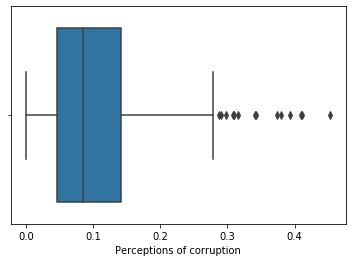

In [47]:
sns.boxplot(df_wh['Perceptions of corruption'])
plt.show()

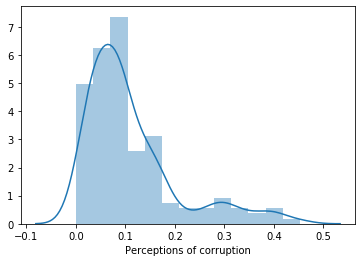

In [48]:
sns.distplot(df_wh['Perceptions of corruption'])
plt.show()

Rerata score untuk 'Perceptions of corruption' ada diangka 0.110603 dan tercatat ada 11 negara yang menjadi outlier di atas upper fence

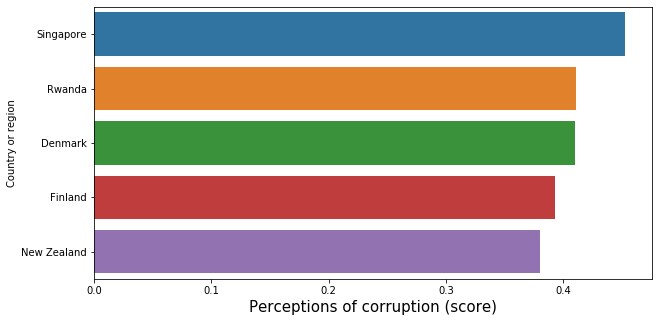

In [49]:
pof=df_wh.sort_values('Perceptions of corruption').tail(5)[::-1]

plt.figure(figsize=(10,5))
sns.barplot(pof['Perceptions of corruption'],pof['Country or region'])
plt.xlabel('Perceptions of corruption (score)',size=15)
plt.show()

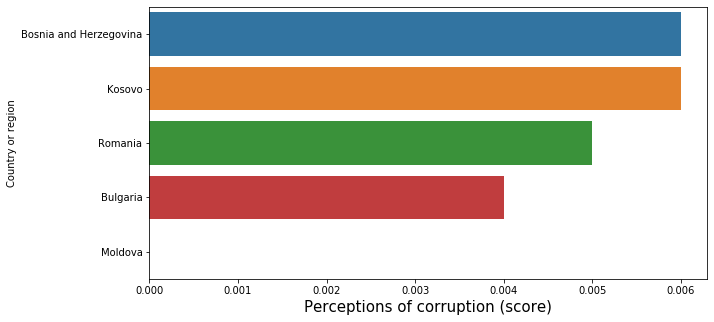

In [50]:
pof=df_wh.sort_values('Perceptions of corruption').head(5)[::-1]

plt.figure(figsize=(10,5))
sns.barplot(pof['Perceptions of corruption'],pof['Country or region'])
plt.xlabel('Perceptions of corruption (score)',size=15)
plt.show()

Berikut 5 negara dengan Perception of corruption tertinggi :
- Singapore
- Rwanda
- Denmark
- Finland
- New Zealand

Berikut 5 negara dengan Perceptions of corruption terendah : 
- Bosnia and Herzegovina
- Kosovo
- Romania
- Bulgaria
- Moldova

(8, 0)

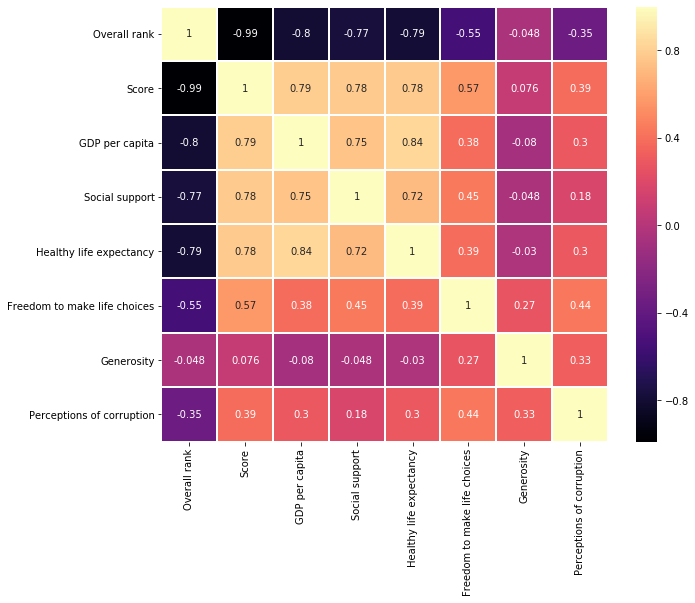

In [51]:
plt.figure(figsize=(10,8))
korelasi = sns.heatmap(df_wh.corr(),cmap='magma',annot=True,linecolor='white',linewidths=1)
korelasi.set_ylim(8,0) # agar tidak kepotong kotaknya

Pada diagram heatmap diatas dapat diambil korelasi sebagai berikut:

    - Korelasi Positif
        - Korelasi Positif terbesar ada di angka 0.84 antara GDP per capita dan Healthy Life Expectancy, dari korelasi ini dapat disimpulkan semakin tinggi GDP per capita maka akan semakin tinggi juga harapan hidup penduduk di negara tersebut
        - Korelasi Positif kedua terbesar ada di angka 0.79 antara GDP per capita dan Score dari korelasi ini dapat disimpulkan semakin tinggi GDP per capita maka akan semakin tinggi juga score yang akan diraih oleh negara tersebut yang akan menentukan seberapa bahagia penduduknya
        - Dari poin-poin diatas dapat disimpulkan bahwa GDP per capita suatu negara adalah faktor paling utama yang mempengaruhi kebahagiaan penduduknya
        
    - Korelasi Negatif
        - Korelasi Negatif terbesar ada di angka -0.99 antara score dan overall rank, hal ini tentu saja terjadi karena score menentukan ranking negara tsb.
        - Korelasi Negatif kedua terbesar ada di angka -0.8 antara overall rank dan gdp per capita, sesuai analisa pada korelasi positif diatas semakin besar gdp per capita suatu negara maka akan semakin kecil overall ranknya (yang mana semakin baik)
        - Korelasi Negatif ketiga terbesar ada di angka -0.79 antara overall rank dan Healthy life Expectancy, dari sini dapat disimpulkan bahwa faktor kedua yang paling penting setelah gdp per capita yang mempengaruhi kebahagiaan penduduknya adalah Healthy Life Expectancy. Dimana semakin tinggi HLE suatu negara makan akan semakin kecil juga rankingnya (yang mana semakin baik)
        
    - Tidak ada Korelasi
        - Nilai korelasi yang hampir mendekati 0 ada antara generosity dan social support, dimana generosity (kedermawaan) penduduk tidak mempengaruhi social support yang diberikan pemerintah
        - Nilai korelai lain yang hampir mendekati 0 ada antara generosity dan score, mirip seperti poin diatas dimana generosity (kedermawaan) penduduk tidak mempengaruhi score 
    